# Firing Rate Estimation 

### Estimating the firing rate in two different method.
-  Finding the optimum number of bins 
-  Finding optimum bandwidth for gaussian kernel density estimation

### Reference: 
- Kernel bandwidth optimization in spike rate estimation
- Hideaki Shimazaki & Shigeru Shinomoto 

- [Kernel Density Estimation](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html)
    
- [Kernel density estimation, bandwidth selection](https://en.wikipedia.org/wiki/Kernel_density_estimation#Bandwidth_selection)
    


In [1]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
import numpy as np
import pylab as plt
from os.path import join
from itng.statistics import (sshist, optimal_bandwidth, optimal_num_bins)

Reading spike rates:

In [2]:
with open(join("data.txt"), "r") as f:
    lines = f.readlines()
    spike_times = []
    for line in lines:
        line = [float(i) for i in line.split()]
        spike_times.extend(line)

spike_times = np.asarray(spike_times)

In [3]:

bins = optimal_num_bins(spike_times) 
print("The optimum number of bins : ", len(bins))

The optimum number of bins :  12


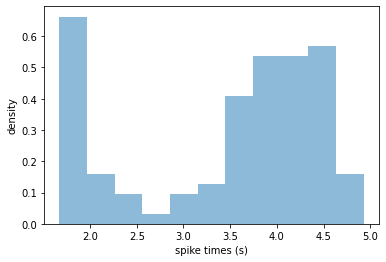

In [4]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.set_xlabel('spike times (s)')
ax.set_ylabel("density")
ax.hist(spike_times, bins=bins, alpha=0.5, density=True);

In [5]:
# Kernel Density Estimation
# Selecting the bandwidth via cross-validation

In [6]:
bandwidth = optimal_bandwidth(spike_times)
print(bandwidth)

0.12618568830660204


In [10]:
# the spikes need to be sorted
spike_times_sorted = np.sort(spike_times)


In [11]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(spike_times_sorted[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(spike_times_sorted[:, None])


In [ ]:
# PLOT the results together

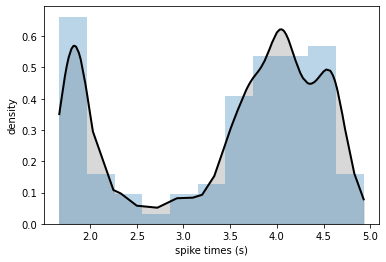

In [16]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.set_xlabel('spike times (s)')
ax.set_ylabel("density")
ax.hist(spike_times, bins=bins, alpha=0.3, density=True);


ax.fill_between(spike_times_sorted, np.exp(logprob), 
                alpha=0.3, 
                color='gray')
ax.plot(spike_times, np.exp(logprob), alpha=1, lw=2, color="k")
plt.show()